With the rise in the primary memory of computer systems, we generally do not run out of memory. This is the reason we do not monitor primary memory usage.

But with the rise in data over time, it can happen that we might still run out of memory. To avoid those kinds of scenarios, we need to monitor which part of the code is using how much memory so that we can avoid such problems from happening again in the future.

#What is Memory Profiling?

The process of analyzing memory usage by different parts of code is referred to as memory profiling. It is one kind of profiling where we measure space complexity (memory consumption) of a program/process. Another one is time profiling where we measure time complexity.

Nowadays, Python has been the go-to language for data scientists worldwide for analysis of big datasets. It does provide various libraries to perform profiling.

#memory profiling:
 memory_profiler, memprof, guppy/hpy, tracemalloc, Scalene, Pympler etc.
time profiling: cProfile, profile, line_profiler, Scalene, yappi, pprofile, Snakeviz, Pyinstrument, py-spy, etc.

#Why optimize?
However… once code is working, you do want it to be efficient!
• want a balance between usability/cleanness and speed/
memory efficiency

• These are not always both achievable, so err on the side of
usability

#Steps to optimization

1) Make sure code works correctly first • DO NOT optimize code you are writing or debugging!

2) Identify use cases for optimization:

• how often is the code called? Is it useful to optimize it?

• If it is not called often and finishes with reasonable time/memory,
stop!

3) Profile the code to identify bottlenecks in a more scientific way
• Profile time spent in each function, line, etc• Profile memory use

4) try to re-write as little as possible to achieve improvement

5) refactor if it is still problematic

#What is Profiling in Computer Science?

Profiling of code is a process where you find out which particular part of the code is taking how much time. This can be useful when optimizing code that is taking more time than expected.

The profiling can be of time (time complexity) or even it can be of memory (space complexity) as well sometimes. There are profilers that let us know memory usage at each statement of code.

What Are Some Useful Python Time Profilers?

Python distribution provides two profilers for measuring execution time of various functions.

#cProfile -
 It's an extension of C hence adds reasonably low overhead to actual code when performing profiling.

#profile -
 It’s totally written in python hence adding a reasonable amount of overhead to actual code when performing profiling.
Both profilers let us measure execution time of various Python functions present in our code/script/program.

Apart from these two, there are many other Python time profilers (line_profiler, py-spy, pyinstrument, yappi, pprofile, Scalene, Snakeviz, etc) that needs to be installed separately using 'pip' or 'conda'.

#What Are Different Ways of Performing Profiling?

There are two ways of profiling code:

#Deterministic Profiling:

Both of the above-mentioned profilers provide deterministic profiling of python code. The deterministic profiling monitors each statement, function call, exceptions, etc.

#Statistical Profiling:
 The other profiling technique is called statistical profiling technique which randomly samples instruction being executed and records time to determine where more time is being spent.
As statistical profiling does not monitor each statement, function calls, etc, and randomly samples which part to monitor, it adds less overhead to profiling.

In [1]:
# if you're using colab, then install the required modules
import sys

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    %pip install --quiet line_profiler snakeviz pyinstrument eliot eliot-tree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.5/183.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 17.4 MB/s eta 0:00:00


#Profiling analyses your code in terms of speed or memory.

This helps identify where the bottlenecks are (why and where is it slow?) and how much potential there is for improvement.

#timeit

An IPython magic command that measures the time execution of an expression.

It runs a few times, depending on how intensive the expression is, and returns the average time with a standard deviation. It is useful for benchmarking small code snippets.

`timeit` is different to `time`, which is a less optimised alternative.  We recommend the use of `timeit`.  

In [2]:
%timeit range(100)

141 ns ± 56.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [3]:
%%timeit
for x in range(100):
    pass

1.64 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#line_profiler

This is module that measures the time spent in each line of a function. A simple example:

In [4]:
%load_ext line_profiler

In [5]:
import time


def relax():
    pass


def bottleneck():
    time.sleep(0.001)


def some_function():
    nums = [num for num in range(1_000)]
    bigger_nums = [num**2 for num in nums]
    bottleneck()
    bigger_nums.extend(bigger_nums)
    relax()

#The Timer unit is the conversion to seconds.

The table shows the following columns for each line of the function (each row):

Line #: The line number.

Hits: The number of times that line was called.

Time: The total time spent calling that line (in the Timer units).

Per Hit: The time spent for one call of that line.

% Time: The percentage of total time spent on that line (this is the often the most useful column).

Line Contents: The source code for that line.


In [6]:
%lprun -f some_function some_function()

#pyinstrument
A statistical profiler of wall-clock time (recording the call stack every 1ms), lowering the overhead compared to tracing profilers (like cProfile).

It hides library frames and fast functions, so you can focus on the slow parts of your code.

The output shows a tree of actions of how the function executes, using a traffic light colour legend (i.e., red = slow).

In [7]:
%load_ext pyinstrument

_     ._   __/__   _ _  _  _ _/_   Recorded: 00:10:24  Samples:  1
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.002     CPU time: 0.001
/   _/                      v5.0.2

Cell [8]

0.001 <cell line: 0>  /tmp/ipython-input-8-701083101.py:1
`- 0.001 some_function  /tmp/ipython-input-5-3630047074.py:12
   `- 0.001 bottleneck  /tmp/ipython-input-5-3630047074.py:8
      `- 0.001 sleep  <built-in>
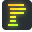

In [8]:
%%pyinstrument
some_function()

In [12]:
import cProfile

The cProfile has a function named run() which accepts any python statement. It'll pass that python statement to exec() function to execute and generate profiling results as well.

Below we are simply running a loop 10000 times and generating random numbers between 1-10 each time. We keep all random numbers in a list and then sum them up. We have passed this statement to the run() method of cProfile to see profiling results of where time is getting spent.

In [13]:
import random

cProfile.run("sum([random.randint(1,10) for i in range(10000)])")

         85914 function calls in 0.034 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.004    0.004    0.034    0.034 <string>:1(<listcomp>)
        1    0.000    0.000    0.034    0.034 <string>:1(<module>)
    10000    0.008    0.000    0.011    0.000 random.py:235(_randbelow_with_getrandbits)
    10000    0.012    0.000    0.025    0.000 random.py:284(randrange)
    10000    0.005    0.000    0.030    0.000 random.py:358(randint)
    30000    0.003    0.000    0.003    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.034    0.034 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sum}
    10000    0.001    0.000    0.001    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
    15909    0.002    0.000    0.002    0.000 {method 'getrandbits' of

we can understand from the above output that a total of 55957 function calls were made. The Ordered by: standard name indicates that the table displayed is sorted by string name printed at last.

The meaning of each column in the table is explained below:

ncalls: It represents a number of times that function was called. It can have two numbers separated by a slash in case of recursive calls. The first number, in that case, represents total calls including recursive calls and the second number represents primitive calls excluding recursive calls.
tottime: It represents total time spent in that function excluding time spent in sub-functions of that function.
percall : It represents tottime divided by ncalls.
cumtime : It represents total time spent in that function including time-spent in sub-functions of that function.
percall : It represents cumtime divided by ncalls.
filename:lineno(function) : It represents filename, line number in file and function name.

In [15]:
import time

def slow_add(a, b):
    time.sleep(0.5)
    return a+b

def fast_add(a, b):
    return a+b

prof = cProfile.Profile()

def main_func():
    arr = []
    prof.enable()
    for i in range(10):

        if i%2==0:
            arr.append(slow_add(i,i))
        else:
            arr.append(fast_add(i,i))
    prof.disable()
    return arr

main_func()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [16]:
prof.print_stats()

         26 function calls in 2.501 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.000    0.000    2.501    0.500 ipython-input-15-376411661.py:3(slow_add)
        5    0.000    0.000    0.000    0.000 ipython-input-15-376411661.py:7(fast_add)
        5    2.501    0.500    2.501    0.500 {built-in method time.sleep}
       10    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [17]:
prof.dump_stats("main_func.prof")

In [18]:
def main_func():
    arr = []
    with cProfile.Profile() as prof:
        for i in range(10):
            if i%2==0:
                arr.append(slow_add(i,i))
            else:
                arr.append(fast_add(i,i))
    return arr, prof

out, prof = main_func()

print(out)

prof.print_stats()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
         27 function calls in 2.501 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 cProfile.py:118(__exit__)
        5    0.000    0.000    2.501    0.500 ipython-input-15-376411661.py:3(slow_add)
        5    0.000    0.000    0.000    0.000 ipython-input-15-376411661.py:7(fast_add)
        5    2.501    0.500    2.501    0.500 {built-in method time.sleep}
       10    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [19]:
def Fibonacci(n):
    if n<=0:
        print("Incorrect input")
    elif n==1:
        return 0
    elif n==2:
        return 1
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

In [20]:
cProfile.run("Fibonacci(25)")

         150052 function calls (4 primitive calls) in 0.067 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.067    0.067 <string>:1(<module>)
 150049/1    0.067    0.000    0.067    0.067 ipython-input-19-2936163828.py:1(Fibonacci)
        1    0.000    0.000    0.067    0.067 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




#Eliot
Logs the performance information. It tracks each function called, its arguments, the return values, and any rasied exceptions. Hence, it can be helpful for profiling in real use cases.

Logging has a higher overhead than `cProfile`.

In [21]:
import eliot

In [22]:
def bottleneck():
    time.sleep(0.5)

In [23]:
@eliot.log_call
def multiply(x, y):
    bottleneck()
    return x * y

In [24]:
@eliot.log_call
def add(x, y):
    return x + y

In [25]:
# remove file if exists
import os

try:
    os.remove("profiling_some_function.log")
except OSError:
    pass


In [26]:
eliot.to_file(open("profiling_some_function.log", "w+"))
result = multiply(add(3, 4), add(5, 6))

In [27]:
!eliot-tree profiling_some_function.log

92ecbb2c-e7d6-4a05-894d-41732bea6e8b
└── __main__.add/1 ⇒ started 2025-06-20 00:22:12Z ⧖ 0.000s
    ├── x: 3
    ├── y: 4
    └── __main__.add/2 ⇒ succeeded 2025-06-20 00:22:12Z
        └── result: 7

4444c583-7b0b-4962-989a-17371657c931
└── __main__.add/1 ⇒ started 2025-06-20 00:22:12Z ⧖ 0.000s
    ├── x: 5
    ├── y: 6
    └── __main__.add/2 ⇒ succeeded 2025-06-20 00:22:12Z
        └── result: 11

a4ff5b7b-48e0-4646-b0f2-8a2a678f43c0
└── __main__.multiply/1 ⇒ started 2025-06-20 00:22:12Z ⧖ 0.500s
    ├── x: 7
    ├── y: 11
    └── __main__.multiply/2 ⇒ succeeded 2025-06-20 00:22:13Z
        └── result: 77



In [34]:
%%writefile one.py
def main_func():
    import random
    arr1 = [random.randint(1,10) for i in range(100000)]
    arr2 = [random.randint(1,10) for i in range(100000)]
    arr3 = [arr1[i]+arr2[i] for i in range(100000)]
    tot = sum(arr3)
    print(tot)

if __name__ == "__main__":
    main_func()

Writing one.py


Below is a list of columns present in profiling output.

Time % Python - It specifies % of the time spent in python.

Time % native - It specifies % of time spent in native code (python library which comes along with python package like random, DateTime, etc and C code).

Sys % - It specifies % time spent in other tasks of OS, not from python or native code. If we put the thread to sleep and CPU is utilized for other tasks, this refers to sys.

Mem % Python - It specifies the amount of memory used by python.

Net (MB) - It specifies net memory allocation in MB during that line of code. If it’s negative then it means that memory was recollected during that instruction.

Memory usage over time /% - It shows memory usage over time as a bar chart.
Copy(MB/s) - It specifies the amount of memory copied per second.

In [35]:
!scalene one.py

1098812
      /content/one.py: % of time = 100.00% (195.191ms) out of 195.191ms.       
       ╷       ╷       ╷       ╷        ╷       ╷               ╷       ╷      
       │Time   │–––––– │–––––– │Memory  │–––––– │–––––––––––    │Copy   │      
  Line │Python │native │system │Python  │peak   │timeline/%     │(MB/s) │/co…  
╺━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━━┿━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━┿━━━━━╸
     1 │       │       │       │        │       │               │       │def   
     2 │       │       │       │        │       │               │       │      
     3 │   21% │   33% │   5%  │        │       │               │    26 │      
     4 │   33% │       │   2%  │        │       │               │       │      
     5 │    6% │       │       │        │       │               │       │      
     6 │       │       │       │        │       │               │       │      
     7 │       │       │       │        │       │               │       │      
     8 │       │       │       │

In [32]:
!pip install scalene

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.9 MB/s eta 0:00:00


In [38]:
!scalene --html --outfile sharry.html one.py

1101025


In [39]:
from IPython.display import HTML

HTML(open("sharry.html").read())

In [40]:
!scalene --reduced-profile  one.py

1097808
      /content/one.py: % of time = 100.00% (182.837ms) out of 182.837ms.       
       ╷       ╷       ╷       ╷        ╷       ╷               ╷       ╷      
       │Time   │–––––– │–––––– │Memory  │–––––– │–––––––––––    │Copy   │      
  Line │Python │native │system │Python  │peak   │timeline/%     │(MB/s) │/co…  
╺━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━━┿━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━┿━━━━━╸
   ... │       │       │       │        │       │               │       │      
     3 │   24% │   33% │       │        │       │               │       │      
     4 │   34% │       │   2%  │        │       │               │       │      
     5 │    6% │       │       │        │       │               │       │      
   ... │       │       │       │        │       │               │       │      
       │       │       │       │        │       │               │       │      
╶──────┼───────┼───────┼───────┼────────┼───────┼───────────────┼───────┼─────╴
       │       │       │       │

In [41]:
!scalene --cpu-only one.py

1100019
      /content/one.py: % of time = 100.00% (154.151ms) out of 154.151ms.       
        ╷        ╷       ╷       ╷                                             
        │Time    │–––––– │–––––– │                                             
  Line  │Python  │native │system │/content/one.py                              
╺━━━━━━━┿━━━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸
      1 │        │       │       │def main_func():                             
      2 │        │       │       │    import random                            
      3 │   21%  │   35% │   1%  │    arr1 = [random.randint(1,10) for i in r  
      4 │   34%  │       │       │    arr2 = [random.randint(1,10) for i in r  
      5 │        │       │       │    arr3 = [arr1[i]+arr2[i] for i in range(  
      6 │    6%  │       │       │    tot = sum(arr3)                          
      7 │        │       │       │    print(tot)                               
      8 │        │       │      

CPU Only Profiling
The fourth example explains how we can eliminate memory usage information from profiling if we don't need it. We can use the --cpu-only option if we want to check only CPU consumption by our script.

In [42]:
!scalene --use-virtual-time one.py

1101208
      /content/one.py: % of time = 100.00% (332.984ms) out of 332.984ms.       
       ╷       ╷       ╷       ╷        ╷       ╷               ╷       ╷      
       │Time   │–––––– │–––––– │Memory  │–––––– │–––––––––––    │Copy   │      
  Line │Python │native │system │Python  │peak   │timeline/%     │(MB/s) │/co…  
╺━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━━┿━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━┿━━━━━╸
     1 │       │       │       │        │       │               │       │def   
     2 │       │       │       │        │       │               │       │      
     3 │   22% │   32% │   4%  │        │       │               │       │      
     4 │   31% │    3% │   3%  │        │       │               │       │      
     5 │    3% │       │       │        │       │               │       │      
     6 │       │       │       │        │       │               │       │      
     7 │       │       │       │        │       │               │       │      
     8 │       │       │       │

In [43]:
!scalene --use-virtual-time one.py

1099067
      /content/one.py: % of time = 100.00% (191.977ms) out of 191.977ms.       
       ╷       ╷       ╷       ╷        ╷       ╷               ╷       ╷      
       │Time   │–––––– │–––––– │Memory  │–––––– │–––––––––––    │Copy   │      
  Line │Python │native │system │Python  │peak   │timeline/%     │(MB/s) │/co…  
╺━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━┿━━━━━━━━┿━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━┿━━━━━╸
     1 │       │       │       │        │       │               │       │def   
     2 │       │       │       │        │       │               │       │      
     3 │   21% │   36% │   4%  │        │       │               │       │      
     4 │   28% │    4% │   1%  │        │       │               │       │      
     5 │    6% │       │       │        │       │               │       │      
     6 │       │       │       │        │       │               │       │      
     7 │       │       │       │        │       │               │       │      
     8 │       │       │       │

In [45]:
!pip install -U memory_profiler

In [46]:
import memory_profiler

print("Memory Profiler Version : {}".format(memory_profiler.__version__))

Memory Profiler Version : 0.61.0


In [47]:
%%writefile example1.py
from memory_profiler import profile

@profile
def main_func():
    import random
    arr1 = [random.randint(1,10) for i in range(100000)]
    arr2 = [random.randint(1,10) for i in range(100000)]
    arr3 = [arr1[i]+arr2[i] for i in range(100000)]
    del arr1
    del arr2
    tot = sum(arr3)
    del arr3
    print(tot)

if __name__ == "__main__":
    main_func()



Writing example1.py


In [48]:
!python -m memory_profiler example1.py

1100822
Filename: example1.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3     41.9 MiB     41.9 MiB           1   @profile
     4                                         def main_func():
     5     41.9 MiB      0.0 MiB           1       import random
     6     43.0 MiB      1.1 MiB      100003       arr1 = [random.randint(1,10) for i in range(100000)]
     7     43.7 MiB      0.8 MiB      100003       arr2 = [random.randint(1,10) for i in range(100000)]
     8     44.5 MiB      0.8 MiB      100003       arr3 = [arr1[i]+arr2[i] for i in range(100000)]
     9     43.8 MiB     -0.7 MiB           1       del arr1
    10     43.1 MiB     -0.8 MiB           1       del arr2
    11     43.1 MiB      0.0 MiB           1       tot = sum(arr3)
    12     42.3 MiB     -0.8 MiB           1       del arr3
    13     42.3 MiB      0.0 MiB           1       print(tot)




In [49]:
%%writefile example1_modified.py
from memory_profiler import profile

@profile
def main_func():
    import random
    arr1 = [random.randint(1,10) for i in range(100000)]
    arr2 = [random.randint(1,10) for i in range(100000)]
    arr3 = [arr1[i]+arr2[i] for i in range(100000)]
    tot = sum(arr3)
    print(tot)

if __name__ == "__main__":
    main_func()


Writing example1_modified.py


In [50]:
!python -m memory_profiler example1_modified.py

1098642
Filename: example1_modified.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3     41.9 MiB     41.9 MiB           1   @profile
     4                                         def main_func():
     5     41.9 MiB      0.0 MiB           1       import random
     6     43.0 MiB      1.1 MiB      100003       arr1 = [random.randint(1,10) for i in range(100000)]
     7     43.7 MiB      0.8 MiB      100003       arr2 = [random.randint(1,10) for i in range(100000)]
     8     44.5 MiB      0.8 MiB      100003       arr3 = [arr1[i]+arr2[i] for i in range(100000)]
     9     44.5 MiB      0.0 MiB           1       tot = sum(arr3)
    10     44.5 MiB      0.0 MiB           1       print(tot)




In [51]:
%%writefile example1_modified2.py
from memory_profiler import profile

@profile(precision=4)
def main_func():
    import random
    arr1 = [random.randint(1,10) for i in range(100000)]
    arr2 = [random.randint(1,10) for i in range(100000)]
    arr3 = [arr1[i]+arr2[i] for i in range(100000)]
    tot = sum(arr3)
    print(tot)

if __name__ == "__main__":
    main_func()

Writing example1_modified2.py


In [52]:
!python -m memory_profiler example1_modified2.py

1100451
Filename: example1_modified2.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3  41.8281 MiB  41.8281 MiB           1   @profile(precision=4)
     4                                         def main_func():
     5  41.8281 MiB   0.0000 MiB           1       import random
     6  42.9961 MiB   1.1680 MiB      100003       arr1 = [random.randint(1,10) for i in range(100000)]
     7  43.7617 MiB   0.7656 MiB      100003       arr2 = [random.randint(1,10) for i in range(100000)]
     8  44.5273 MiB   0.7656 MiB      100003       arr3 = [arr1[i]+arr2[i] for i in range(100000)]
     9  44.5273 MiB   0.0000 MiB           1       tot = sum(arr3)
    10  44.5273 MiB   0.0000 MiB           1       print(tot)




The mprof command provides us with information about the usage of memory over time of the execution of the script. This can be very useful for analysis to understand which part of the script is taking more memory as well as when the memory usage is rising.

Apart from script, "mprof" command can be used to profile memory usage of Python module and Python executable as well.

The mprof command records memory usage at every 0.1 second when the script is running and stores it in a .dat file.

It even provides plotting functionality which plots memory usage as a function of time using matplotlib.

In [55]:
%%writefile random_number_generator.py
import time
import numpy as np

@profile
def very_slow_random_generator():
    time.sleep(5)
    arr1 = np.random.randint(1,100, size=(1000,1000))
    avg = arr1.mean()
    return avg

@profile
def slow_random_generator():
    time.sleep(2)
    arr1 = np.random.randint(1,100, size=(1000,1000))
    avg = arr1.mean()
    return avg

@profile
def fast_random_generator():
    time.sleep(1)
    arr1 = np.random.randint(1,100, size=(1000,1000))
    avg = arr1.mean()
    return avg

@profile
def main_func():
    avg1 = fast_random_generator()
    avg2 = slow_random_generator()
    avg3 = very_slow_random_generator()

    print("Averages: {:.3f}, {:.3f}, {:.3f}".format(avg1,avg2,avg3))

if __name__ == '__main__':
    main_func()

Overwriting random_number_generator.py


In [57]:
!mprof run random_number_generator.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Averages: 49.944, 50.040, 50.017


In [60]:
!head -n 10 mprofile_20220803182143.dat

CMDLINE /usr/bin/python3 random_number_generator.py
MEM 0.007812 1750380395.9764
MEM 16.609375 1750380396.0768
MEM 25.328125 1750380396.1772
MEM 32.062500 1750380396.2776
MEM 38.609375 1750380396.3779
MEM 42.312500 1750380396.4783
MEM 49.199219 1750380396.5787
MEM 52.281250 1750380396.6791
MEM 52.281250 1750380396.7796


In [66]:
!mprof list

0 mprofile_20250620004635.dat 00:46:35 20/06/2025
1 mprofile_20250620005138.dat 00:51:38 20/06/2025


In [61]:
!mprof run random_number_generator.py ARG1 ARG2

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Averages: 50.027, 49.967, 50.042


In [63]:
!head -n 10 mprofile_20250620005138.dat

CMDLINE /usr/bin/python3 random_number_generator.py ARG1 ARG2
MEM 0.527344 1750380698.8886
MEM 21.222656 1750380698.9893
MEM 31.574219 1750380699.0897
MEM 40.117188 1750380699.1901
MEM 50.218750 1750380699.2904
MEM 53.390625 1750380699.3908
MEM 53.390625 1750380699.4912
MEM 53.390625 1750380699.5918
MEM 53.390625 1750380699.6921


In [73]:
!mprof plot mprofile_20250620005138.dat --output  plot.png

usage: mprof plot [options] [file.dat]
mprof: error: unrecognized arguments: plot.png


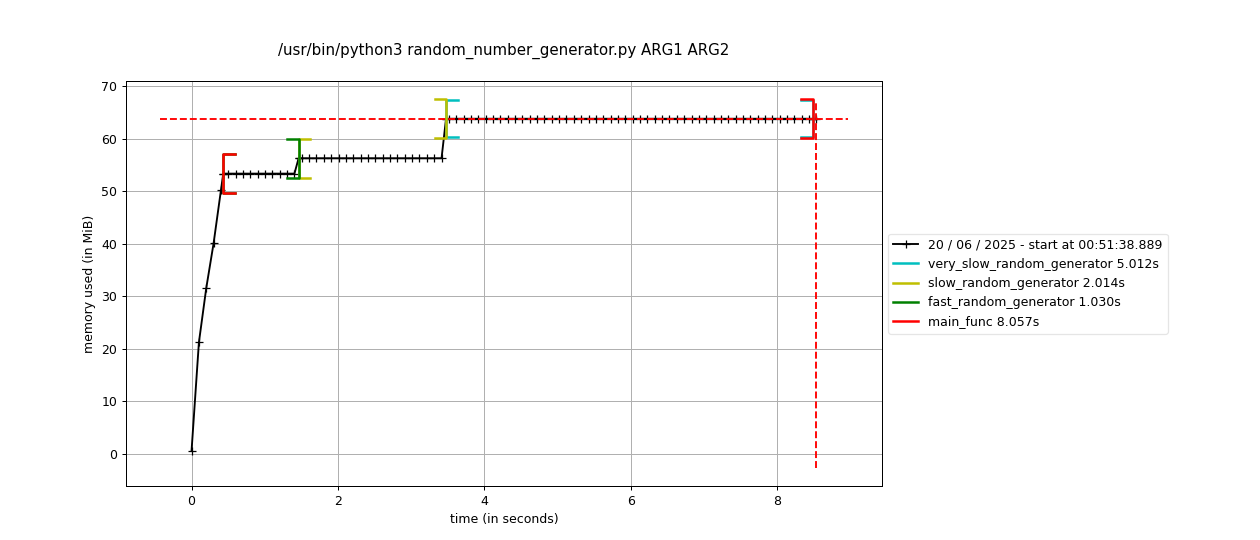

In [69]:
!mprof plot --help

usage: mprof plot [options] [file.dat]

Plots using matplotlib the data file `file.dat` generated using `mprof run`.
If no .dat file is given, it will take the most recent such file in the
current directory.

positional arguments:
  profiles              profiles made by mprof run

options:
  -h, --help            show this help message and exit
  --version             show program's version number and exit
  --title TITLE, -t TITLE
                        String shown as plot title
  --no-function-ts, -n  Do not display function timestamps on plot.
  --output OUTPUT, -o OUTPUT
                        Save plot to file instead of displaying it.
  --window XLIM, -w XLIM
                        Plot a time-subset of the data. E.g. to plot between 0
                        and 20.5 seconds: --window 0,20.5
  --flame, -f           Plot the timestamps as a flame-graph instead of the
                        default brackets
  --slope, -s           Plot a trend line and its numerical slope
  